In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math as M
from scipy.interpolate import griddata

from pysph.tools.interpolator import Interpolator


# mu, sigma = 0, M.sqrt(2*nu*0.5)
GAMMA=1.0
nu=0.1
tf=1.0
n=200
sigma=2*nu*tf
gamma=GAMMA/n


class InterpolateFunction(Equation):

    def initialize(self, d_idx, d_prop):
        d_prop[d_idx] = 0.0

    def loop(self, s_idx, d_idx, s_temp_prop, d_prop, WIJ):
        d_prop[d_idx] += WIJ*s_temp_prop[s_idx]

        

# class vorticies():
#     def __init__(self,gamma,x,y):
#         self.x=x
#         self.y=y
#         self.gamma=gamma
#         self.z=x+1j*y

# N=GAMMA/g_max
z=complex(0,0)
Pa=np.zeros(n,dtype=complex)
for i in range(n):
    Pa[i]=z
#     print(Pa[i].real)
    
plt.scatter(Pa.real,Pa.imag)
plt.show()

values=np.ones(n)*gamma

# for i in range(n):
x=np.random.normal(0, sigma,n)
y=np.random.normal(0, sigma,n)
#   print(x,y)

z=x+1j*y
Pa+=z


        
# interp = Interpolator([pa, boundary], 10000,
#                                   equations=[
#                 InterpolateFunction(
#                     dest='interpolate',
#                     sources=['Pa'])
#             ])
# print(Pa)   

# xi = yi = np.linspace(-0.75,0.75,100)
# xi,yi = np.meshgrid(xi,yi)

# def interpolator()

# zi = griddata((x,y),values,(xi,yi),method='linear')

# mask out the field
# zi[mask] = np.nan


plt.figure()
# plt.contourf(xi,yi,values)
plt.scatter(Pa.real,Pa.imag)

plt.axis('equal')
plt.show()


NameError: name 'Equation' is not defined

0.0005


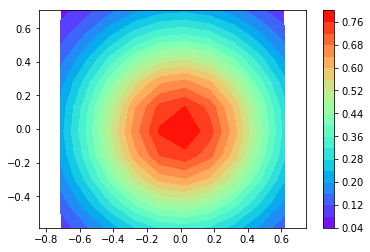

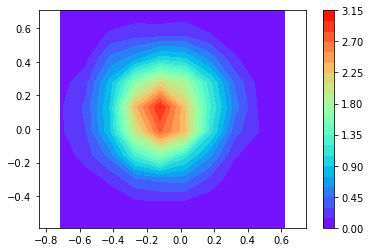

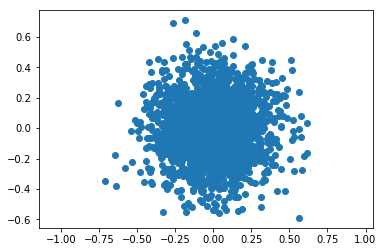

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as M

plt.close('all')

GAMMA=1.0
nu=0.1
tf=1.0
n=2000
sigma=2*nu*tf
gamma=GAMMA/n
mu=0.0

print(gamma)

gamma_arr=np.zeros((10,10))

# z=complex(0,0)
# Pa=np.zeros(n,dtype=complex)
# for i in range(n):
#     Pa[i]=z
    
values=np.ones(n)*gamma

# for i in range(n):
x=np.random.normal(mu, sigma,n)
y=np.random.normal(mu, sigma,n)
#   print(x,y)

z=x+1j*y
Pa+=z

def get_box_data(value,arr):
    m1=0
    m2=0
    idx=0
    for i in range(len(arr)):
        if value < arr[i]:
#             print('here')
            m1=value-arr[i-1]
            m2=arr[i]-value
            idx=i
            break
    return m1,m2,idx

def heat_kernel(r,kin_visc,dt):
    f = (1/(4*np.pi*kin_visc*dt))*np.exp((-r**2)/(4*kin_visc*dt))
    return f

xe,ye=np.linspace(min(x),max(x),10),np.linspace(min(y),max(y),10)
gridx,gridy=np.meshgrid(xe,ye)
Z=gridx+1j*gridy
r=np.abs(Z)

omega = heat_kernel(r,nu,tf)
omega=omega*GAMMA
# gamma_exact = omega*h**2 
# fig=plt.figure()
# ax = fig.gca(projection='3d')
# surf= ax.plot_surface(gridx,gridy,omega, linewidth=0,    antialiased=True)
# surf2= ax.plot_surface(gridx,gridy,omega, linewidth=0,   antialiased=False)
# fig.colorbar()
plt.figure()
plt.contourf(gridx,gridy,omega,20,cmap=cm.rainbow)
plt.colorbar()
plt.axis('equal')

# print

def gamma_update(gamma_arr,m1x,m2x,idx,m1y,m2y,idy):
    gamma_arr[idx-1,idy-1]+=m1x*m1y
    gamma_arr[idx,idy-1]+=m2x*m1y
    gamma_arr[idx-1,idy]+=m1x*m2y
    gamma_arr[idx,idy]+=m2x*m2y


for i in range(len(Pa)):
    m1x,m2x,idx=get_box_data(Pa[i].real,xe)
    m1y,m2y,idy=get_box_data(Pa[i].imag,ye)
    gamma_update(gamma_arr,m1x,m2x,idx,m1y,m2y,idy)
    
    

plt.figure()
plt.contourf(gridx,gridy,gamma_arr,20,cmap=cm.rainbow)
plt.colorbar()
plt.axis('equal')




# exact=

plt.figure()

plt.axis('equal')
# plt.contourf(xi,yi,values)
plt.scatter(Pa.real,Pa.imag)

plt.show()

    

    
    

In [ ]:
@jit
def vortex_velocity(z1, z2, gamma):
    return -1j*gamma/(2*np.pi*(z1 - z2))


@jit
def velocity(z, gamma, v):
    n = len(z)
    for i in range(n):
        for j in range(n):
            if i != j:
                v[i] += vortex_velocity(z[i], z[j], gamma[j])


class Vortices:
    def __init__(self, z, gamma):
        self.z = z
        self.gamma = gamma
        self.v = np.zeros_like(z)

    def velocity(self):
        velocity(self.z, self.gamma, self.v)


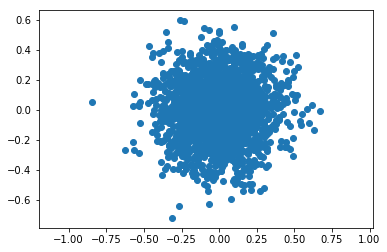

(10, 10)
(10, 10)
0.489843712824
0.341921566379


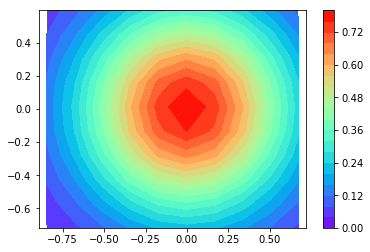

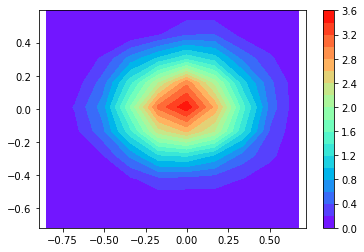

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as M

plt.close('all')


# for i in range(n):
def RVM(n,mu,sigma):
    x=np.random.normal(mu, sigma,n)
    y=np.random.normal(mu, sigma,n)
#     Pa=np.zeros_like
    z=x+1j*y
    Pa=np.zeros_like(z)
    Pa+=z
    plt.figure()
    plt.axis('equal')
    plt.scatter(Pa.real,Pa.imag)
    plt.show()
    
    return Pa,x,y

def heat_kernel(r,kin_visc,dt):
    f = (1/(4*np.pi*kin_visc*dt))*np.exp((-r**2)/(4*kin_visc*dt))
    return f


def exact(x,y,N):
    xe,ye=np.linspace(min(x),max(x),N),np.linspace(min(y),max(y),N)
    gridx,gridy=np.meshgrid(xe,ye)
    Z=gridx+1j*gridy
    r=np.abs(Z)
    omega = heat_kernel(r,nu,tf)
    omega=omega*GAMMA
#     fig=plt.figure()
#     ax = fig.gca(projection='3d')
#     surf= ax.plot_surface(gridx,gridy,omega, linewidth=0, cmap=cm.rainbow,  antialiased=True)  
    plt.figure()
    plt.contourf(gridx,gridy,omega,20,cmap=cm.rainbow)
    plt.colorbar()
    plt.axis('equal')
#     plt.show()

    return omega,xe,ye

def gamma_update(gamma_arr,m1x,m2x,idx,m1y,m2y,idy):
    gamma_arr[idx-1,idy-1]+=m1x*m1y
    gamma_arr[idx,idy-1]+=m2x*m1y
    gamma_arr[idx-1,idy]+=m1x*m2y
    gamma_arr[idx,idy]+=m2x*m2y
    
def get_box_data(value,arr):
    m1=0
    m2=0
    idx=0
    for i in range(len(arr)):
        if value < arr[i]:
#             print('here')
            m1=value-arr[i-1]
            m2=arr[i]-value
            idx=i
            break
    return m1,m2,idx

def interp(Pa,xe,ye,gamma_arr):
    for i in range(len(Pa)):
        m1x,m2x,idx=get_box_data(Pa[i].real,xe)
        m1y,m2y,idy=get_box_data(Pa[i].imag,ye)
        gamma_update(gamma_arr,m1x,m2x,idx,m1y,m2y,idy)
        gridx,gridy=np.meshgrid(xe,ye)
        
    plt.figure()
    plt.contourf(gridx,gridy,gamma_arr,20,cmap=cm.rainbow)
    plt.colorbar()
    plt.axis('equal')
#     plt.show()


GAMMA=1.0
nu=0.1
tf=1.0
n=2000
N=10
sigma=2*nu*tf
gamma=GAMMA/n
mu=0.0


plt.close('all')
gamma_arr=np.zeros((N,N))

Pa,x,y=RVM(n,mu,sigma)

omega,xe,ye=exact(x,y,N)


interp(Pa,xe,ye,gamma_arr)
print(np.shape(omega))

print(np.shape(gamma_arr))
# print(gamma_arr)
# print(omega)

print(sum(sum(gamma_arr))/N**2)
print(sum(sum(omega))/N**2)

# print(sum(gamma_arr),sum(omega))
plt.show()


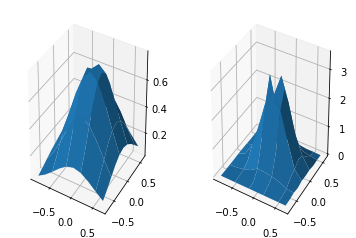

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# %matplotlib qt
plt.close('all')

X,Y=np.meshgrid(xe,ye)
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, omega, rstride=2, cstride=2, linewidth=0)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, gamma_arr, rstride=2, cstride=2, linewidth=0)

# surface_plot with color grading and color bar
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# p = ax.plot_surface(X, Y, omega, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# cb = fig.colorbar(p, shrink=0.5)

plt.show()